In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
# read the csv file using read_csv function of pandas
train = pd.read_csv("/content/drive/MyDrive/APPLES/TOT_DAT.csv")


In [ ]:
train['cell_type'].value_counts()

Rotten    2213
Ripe      2149
Unripe    1988
Name: cell_type, dtype: int64

In [ ]:
pd.set_option('display.max_rows', train.shape[0]+1)
print(train)

               image_names cell_type  xmin  xmax  ymin  ymax
0       RED_DATA (789).jpg      Ripe    92   915   122   919
1     BLACK_DATA (611).jpg    Rotten   470   521   462   514
2     BLACK_DATA (460).jpg    Rotten   377   482   305   387
3     GREEN_DATA (429).jpg    Unripe   224   345   501   614
4     GREEN_DATA (735).jpg    Unripe   152   489   202   559
5     BLACK_DATA (516).jpg    Rotten   639   736    31   123
6       RED_DATA (454).jpg      Ripe   365   835   467   857
7     GREEN_DATA (639).jpg    Unripe   212   551   145   445
8     GREEN_DATA (332).jpg    Unripe   487   710   103   345
9     GREEN_DATA (123).jpg    Unripe   301   372   198   272
10      RED_DATA (811).jpg      Ripe   129   891   254   929
11    GREEN_DATA (667).jpg    Unripe   549   776   157   390
12    BLACK_DATA (170).jpg    Rotten   663   715   264   323
13    GREEN_DATA (288).jpg    Unripe   224   526   324   589
14    BLACK_DATA (166).jpg    Rotten   157   741   135   707
15      RED_DATA (194).j

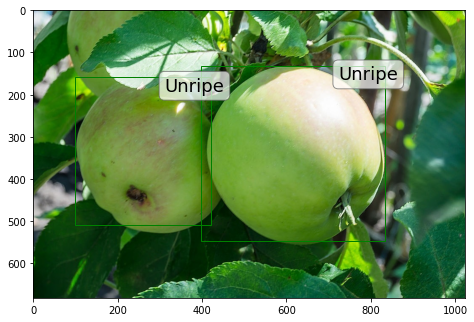

In [ ]:
fig = plt.figure()
#add axes to the image
ax = fig.add_axes([0,0,1,1])
image = plt.imread('/content/drive/MyDrive/APPLES/TOT_DAT/GREEN_DATA (777).jpg')
# read and plot the image
plt.imshow(image)
bbox_props = dict(boxstyle="round", fc="w", ec="0.4", alpha=0.7)

# iterating over the image for different objects
for _,row in train[train.image_names == "GREEN_DATA (777).jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'Ripe':
        edgecolor = 'r'
        ax.annotate('Ripe', xy=(xmax-40,ymin+20),ha="center", va="center", size=18,bbox=bbox_props)
    elif row.cell_type == 'Unripe':
        edgecolor = 'g'
        ax.annotate('Unripe', xy=(xmax-40,ymin+20),ha="center", va="center", size=18,bbox=bbox_props)
    elif row.cell_type == 'Rotten':
        edgecolor = 'k'
        ax.annotate('Rotten', xy=(xmax-40,ymin+20),ha="center", va="center", size=18,bbox=bbox_props)
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [ ]:
# !pip install keras==2.0.3
# !pip install tensorflow==1.15.0

In [ ]:
%cd /content/drive/My Drive/APPLES
%ls

/content/drive/My Drive/APPLES
all_imgs.npy     model_frcnn.hdf5  testimage/      train_frcnn.py
config.pickle    README.md         test_video.mp4  video_stream.py
data_preprop.py  requirements.txt  TOT_DAT/
keras_frcnn/     results_imgs/     TOT_DAT.csv
measure_map.py   test_frcnn.py     TOT_DAT.txt


In [ ]:
from __future__ import division
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Input
from keras.models import Model
from keras_frcnn import config, data_generators
from keras_frcnn import losses as losses
import keras_frcnn.roi_helpers as roi_helpers
from keras.utils import generic_utils

In [ ]:
# !python train_frcnn.py -o simple --hf --rot --num_epochs 50 

In [ ]:
# !python train_frcnn.py -o simple --hf --rot --num_epochs 50 --input_weight_path model_frcnn.hdf5

In [ ]:
# !pip install 'h5py<3.0.0'

In [ ]:
%ls

all_imgs.npy     measure_map.py    test_frcnn.py   TOT_DAT.csv
config.pickle    model_frcnn.hdf5  testimage/      TOT_DAT.txt
data_preprop.py  README.md         test_video.mp4  train_frcnn.py
keras_frcnn/     requirements.txt  TOT_DAT/        video_stream.py


In [ ]:
import h5py
print(h5py.__version__)
######2.10.0


2.10.0


In [ ]:
!python test_frcnn.py -p  testimage

Using TensorFlow backend.
{0: 'Ripe', 1: 'Rotten', 2: 'Unripe', 3: 'bg'}







Instructions for updating:
keep_dims is deprecated, use keepdims instead
Loading weights from ./model_frcnn.hdf5



2022-04-07 11:10:36.074282: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-04-07 11:10:36.082602: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-04-07 11:10:36.082847: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563dc5ca6c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-04-07 11:10:36.082885: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-04-07 11:10:36.086243: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-07 11:10:36.277250: I tensorflow/stream_exec

In [ ]:
# !python video_stream.py -p test_video.mp4 